In [52]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_excel ('My_calculation_result.xlsx')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 11 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Order ID                                                      124 non-null    int64  
 1   AWB Code                                                      124 non-null    int64  
 2   Total weight as per X (KG)                                    124 non-null    float64
 3   Weight slab as per X (KG)                                     124 non-null    float64
 4   Total weight as per Courier Company (KG)                      124 non-null    float64
 5   Weight slab charged by Courier Company (KG)                   124 non-null    float64
 6   Delivery Zone as per X                                        124 non-null    object 
 7   Delivery Zone charged by Courier Compay                       124 non-n

Here I write a code for find the total correctly charged delivery and count.

In [55]:
total_invoice_amount = 0
count_for_correctly_charged = 0
for i in range(len(df)):
    if df["Difference Between Expected Charges and Billed Charges (Rs.)"][i] == 0:
        total_invoice_amount = round((total_invoice_amount + df["Charges Billed by Courier Company (Rs.)"][i]),1)
        count_for_correctly_charged = count_for_correctly_charged + 1

In [56]:
print('Total Invoice Amount:',total_invoice_amount)
print('Number of correctly charged delivery:',count_for_correctly_charged)

Total Invoice Amount: 2096.3
Number of correctly charged delivery: 23


Here I write a code for find the amount for overcharged delivery and count.

In [57]:
overcharged_amount = 0
count_for_overcharged = 0
for i in range(len(df)):
    if df["Charges Billed by Courier Company (Rs.)"][i] > df["Expected Charge as per X (Rs.)"][i]:
        overcharged_amount = round((overcharged_amount + df["Difference Between Expected Charges and Billed Charges (Rs.)"][i]),1)
        count_for_overcharged = count_for_overcharged + 1
                                                             

In [58]:
print('Total overcharged Amount:',overcharged_amount)
print('Number of overcharged charged delivery:',count_for_overcharged)

Total overcharged Amount: -4426.6
Number of overcharged charged delivery: 79


Here I write a code for find the amount for undercharged delivery and count.

In [59]:
undercharged_amount = 0
count_for_undercharged = 0
for i in range(len(df)):
    if df["Charges Billed by Courier Company (Rs.)"][i] < df["Expected Charge as per X (Rs.)"][i]:
        undercharged_amount = round((undercharged_amount + df["Difference Between Expected Charges and Billed Charges (Rs.)"][i]),1)
        count_for_undercharged = count_for_undercharged + 1

In [60]:
print('Total underharged Amount:',undercharged_amount)
print('Number of undercharged charged delivery:',count_for_undercharged)

Total underharged Amount: 585.8
Number of undercharged charged delivery: 22


Here I created a data frame in which summry has to stored.

In [50]:
data = {'Count':[count_for_correctly_charged, count_for_overcharged, count_for_undercharged],
        'Amount (Rs.)':[total_invoice_amount, overcharged_amount, undercharged_amount]}
  
# Creates pandas DataFrame.
df2 = pd.DataFrame(data, index =['Total orders where X has been correctly charged',
                                'Total Orders where X has been overcharged',
                                'Total Orders where X has been undercharged'])

In [61]:
df2

,Count,Amount (Rs.)
Total orders where X has been correctly charged,23,2096.3
Total Orders where X has been overcharged,79,-4426.6
Total Orders where X has been undercharged,22,585.8


Here I save my df2 dataframe into excle name as "My_Summary_result".

In [64]:
#df2.to_excel("My_Summary_result.xlsx", index=True)

In [66]:
df

,Order ID,AWB Code,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Compay,Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001806210,1091117221940,0.220,0.5,2.92,3.0,b,b,33.0,174.5,-141.5
1,2001806226,1091117222065,0.480,0.5,0.68,1.0,d,d,45.4,90.2,-44.8
2,2001806229,1091117222080,0.500,0.5,0.71,1.0,d,d,45.4,90.2,-44.8
3,2001806232,1091117222124,1.302,1.5,1.30,1.5,d,d,135.0,135.0,0.0
4,2001806233,1091117222135,0.245,0.5,0.78,1.0,b,b,33.0,61.3,-28.3
...,...,...,...,...,...,...,...,...,...,...,...
119,2001821995,1091121183730,0.477,0.5,0.50,0.5,b,d,33.0,45.4,-12.4
120,2001822466,1091121305541,1.376,1.5,1.10,1.5,b,d,89.6,135.0,-45.4
121,2001823564,1091121666133,0.672,1.0,0.70,1.0,d,d,176.3,172.8,3.5
122,2001825261,1091121981575,1.557,2.0,1.60,2.0,d,d,355.5,345.0,10.5


<AxesSubplot:xlabel='Delivery Zone charged by Courier Compay', ylabel='count'>

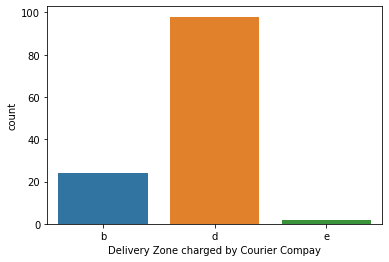

In [89]:
import seaborn as sns
sns.countplot(x="Delivery Zone charged by Courier Compay" , data=df)

<AxesSubplot:xlabel='Delivery Zone as per X', ylabel='count'>

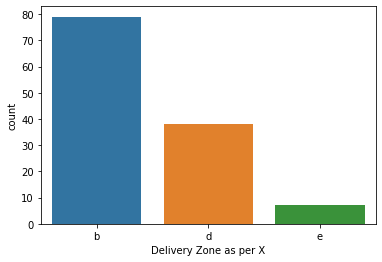

In [74]:
sns.countplot(x="Delivery Zone as per X" , data=df)

In [90]:
count = 0
for i in range(len(df)):
    if df["Charges Billed by Courier Company (Rs.)"][i] < df["Expected Charge as per X (Rs.)"][i]:
        count = count_for_undercharged + 1
        
print("Count for Weight slab charged by Courier Company (KG) is greater than Expected Charge as per X (Rs.):", count)

Count for Weight slab charged by Courier Company (KG) is greater than Expected Charge as per X (Rs.): 23
